In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Assume X and y are your features and target variable
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv').dropna()

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
X = df[['Age','Fare']]
y = df['Survived']

In [7]:
X

,Age,Fare
1,38.0,71.2833
3,35.0,53.1000
6,54.0,51.8625
10,4.0,16.7000
11,58.0,26.5500
...,...,...
871,47.0,52.5542
872,33.0,5.0000
879,56.0,83.1583
887,19.0,30.0000


In [8]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [9]:
model = LogisticRegression()

# Fit the model on the data. 
model.fit(X, y)

LogisticRegression()

In [10]:
# Get the prediction (probabilities)
predicted = model.predict_proba(X)[:, 1]
predicted

array([0.66335475, 0.6703938 , 0.50773786, 0.84023115, 0.44646954,
       0.64121654, 0.70804948, 0.89473579, 0.57700518, 0.42125085,
       0.61776964, 0.67868255, 0.70638509, 0.88060539, 0.5873405 ,
       0.34462514, 0.76454496, 0.78683327, 0.56949915, 0.86978905,
       0.6533626 , 0.53380742, 0.76265355, 0.65453347, 0.76983707,
       0.63306682, 0.77321457, 0.42731983, 0.46830032, 0.51941521,
       0.86506353, 0.84987698, 0.57112528, 0.56907217, 0.84621996,
       0.60868758, 0.75009732, 0.71334404, 0.68030967, 0.69736696,
       0.63236499, 0.65402613, 0.67864894, 0.41172835, 0.73586205,
       0.55381192, 0.57796044, 0.57605346, 0.74060818, 0.63247891,
       0.45486425, 0.80745502, 0.62461769, 0.90763096, 0.72648841,
       0.91079278, 0.82888289, 0.71157625, 0.77270661, 0.89779457,
       0.78770456, 0.70414721, 0.73373622, 0.62473813, 0.80280912,
       0.55883641, 0.73419083, 0.72676347, 0.69670488, 0.57026735,
       0.85434651, 0.87682547, 0.71815877, 0.76474687, 0.47857

In [13]:
# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))
log_odds

array([ 0.67828021,  0.70996669,  0.03095391,  1.65994892, -0.21494562,
        0.58064819,  0.88592965,  2.14005497,  0.31049131, -0.31764063,
        0.48009219,  0.7477239 ,  0.87789146,  1.99817553,  0.35298191,
       -0.64275012,  1.17776084,  1.30594171,  0.27980798,  1.8990949 ,
        0.63385298,  0.13543631,  1.16728296,  0.63902697,  1.20739143,
        0.5453962 ,  1.22655226, -0.29279462, -0.126969  ,  0.07769992,
        1.85799892,  1.73363653,  0.28644376,  0.27806665,  1.70525604,
        0.44179886,  1.09913142,  0.91168107,  0.75519528,  0.83479079,
        0.54237611,  0.63678404,  0.7475698 , -0.35682506,  1.02457114,
        0.21608457,  0.31440636,  0.30659311,  1.04913196,  0.54286618,
       -0.18103583,  1.43355754,  0.50919479,  2.28504602,  0.97687852,
        2.32335347,  1.57773069,  0.90305185,  1.2236578 ,  2.17295644,
        1.31114418,  0.86712544,  1.0136621 ,  0.50970847,  1.4039448 ,
        0.23644104,  1.01599033,  0.97826324,  0.83165558,  0.28

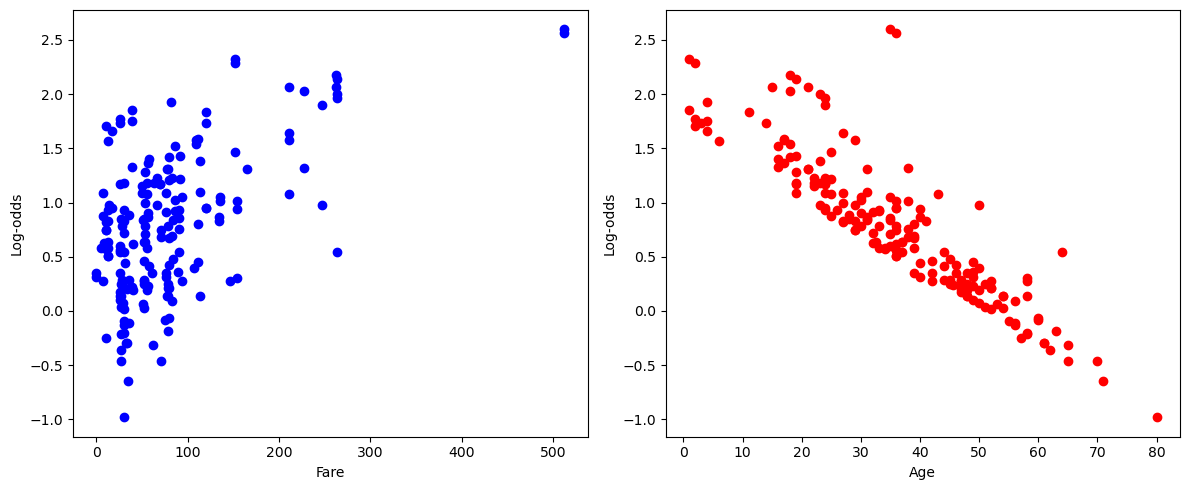

In [14]:
# Create figure and axes for subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot Fare vs log-odds
ax[0].scatter(x=X['Fare'].values, y=log_odds, color='blue')
ax[0].set_xlabel("Fare")
ax[0].set_ylabel("Log-odds")

# Plot Age vs log-odds
ax[1].scatter(x=X['Age'].values, y=log_odds, color='red')
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Log-odds")

# Show plots
plt.tight_layout()
plt.show()

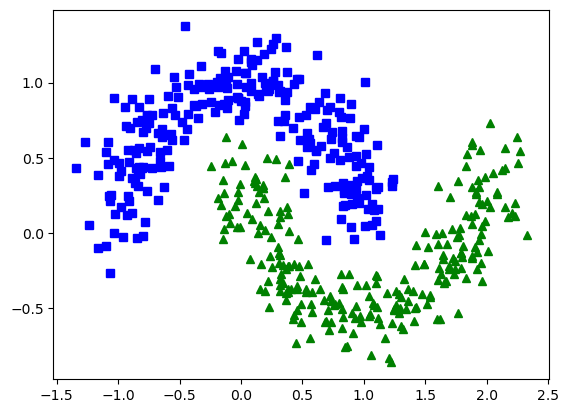

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_moons(n_samples=500, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

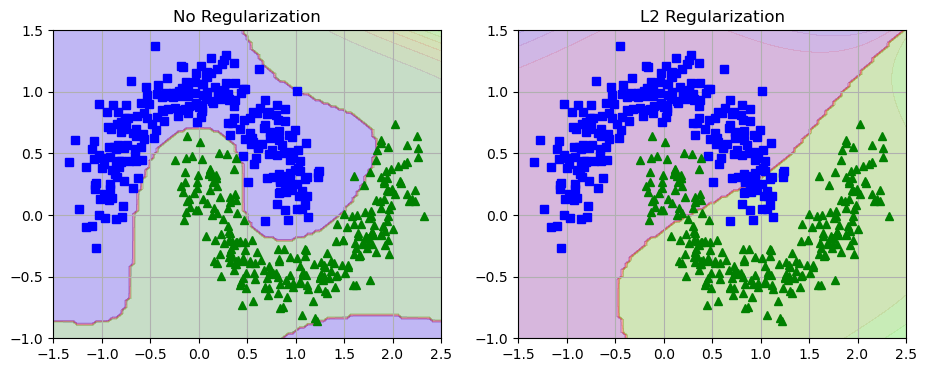

In [16]:
# Create a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')

# Create a function to plot the decision boundary
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Logistic Regression without regularization
model_no_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=1e10, solver="liblinear", random_state=42))
])

# Logistic Regression with L2 regularization
model_l2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=0.001, solver="liblinear", random_state=42))  # C=0.1 implies a stronger regularization
])

model_no_reg.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

# Now, let's plot the decision boundaries
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(model_no_reg, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("No Regularization")

plt.subplot(122)
plot_predictions(model_l2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("L2 Regularization")

plt.show()


In [17]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')  # Make sure to provide the correct path to your file

# Drop rows with missing values and select only numerical features
df = df.dropna().select_dtypes(include=['number'])

df.drop(columns=['PassengerId'],inplace=True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


In [18]:
# Define features and target variables
X = df.drop('Survived', axis=1)
y = df['Survived']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a logistic regression model with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42,C=0.5)

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the model's coefficients
coefficients = model.coef_
print("Model coefficients:", coefficients)

# Extract original column names from DataFrame
column_names = df.drop('Survived', axis=1).columns

# Features with coefficients that are 0 were effectively eliminated by the L1 regularization
eliminated_features = column_names[coefficients[0] == 0]
print("Eliminated features:", eliminated_features)


Model coefficients: [[-0.10313963 -0.38245202  0.         -0.10773421  0.26175659]]
Eliminated features: Index(['SibSp'], dtype='object')
